# Sentiment Classification using AutoML

Dataset used - [Corona NLP dataset from Kaggle](https://www.kaggle.com/datatattle/covid-19-nlp-text-classification)

Reference - https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_NLP_Demo.ipynb


In [ ]:
pip install deep_autoviml

In [ ]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import optuna
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dropout,  BatchNormalization, GaussianNoise
from storm_tuner import Tuner
from tensorflow import keras

In [ ]:
from google.colab import files

files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d datatattle/covid-19-nlp-text-classification

  0% 0.00/4.38M [00:00<?, ?B/s]
100% 4.38M/4.38M [00:00<00:00, 72.5MB/s]


In [ ]:
!unzip covid-19-nlp-text-classification.zip -d covid_data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/covid_data/Corona_NLP_test.csv")
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
data.Sentiment.unique()

array(['Extremely Negative', 'Positive', 'Extremely Positive', 'Negative',
       'Neutral'], dtype=object)

In [ ]:
BATCHSIZE = 256
CLASSES = 5
EPOCHS = 25
NUM_TRIALS = 5

In [ ]:
# download dataset from Kaggle: https://www.kaggle.com/datatattle/covid-19-nlp-text-classification
target = 'Sentiment'
print(df.shape)
df.head(1)

(3798, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative


In [ ]:
keras_model_type =  "USE" ## always try "auto" first, then "basic", "deep", "BERT", "USE", cnn1", "LSTM" etc.
keras_options = {"early_stopping": True, 'epochs': 350, 'steps_per_epoch': 15, 'class_weight': True}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"storm", "max_trials":10, }

## always set the tuner to "storm" first and then "optuna"
#### You always need 15 max_trials to get something decent #####
trainfile = "/content/covid_data/Corona_NLP_train.csv"

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    epochs : 350
    steps_per_epoch : 15
    class_weight : True
    early_stopping : True
Using following model_options given as input:
    max_trials : 10
    tuner : storm
Max Trials : 10. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows in file <= 10000 maxrows, loading entire file into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Multi_Classification and Single_Label problem
Loaded a small data sample of size = (10000, 6) into pandas dataframe to analyze...
    Classify

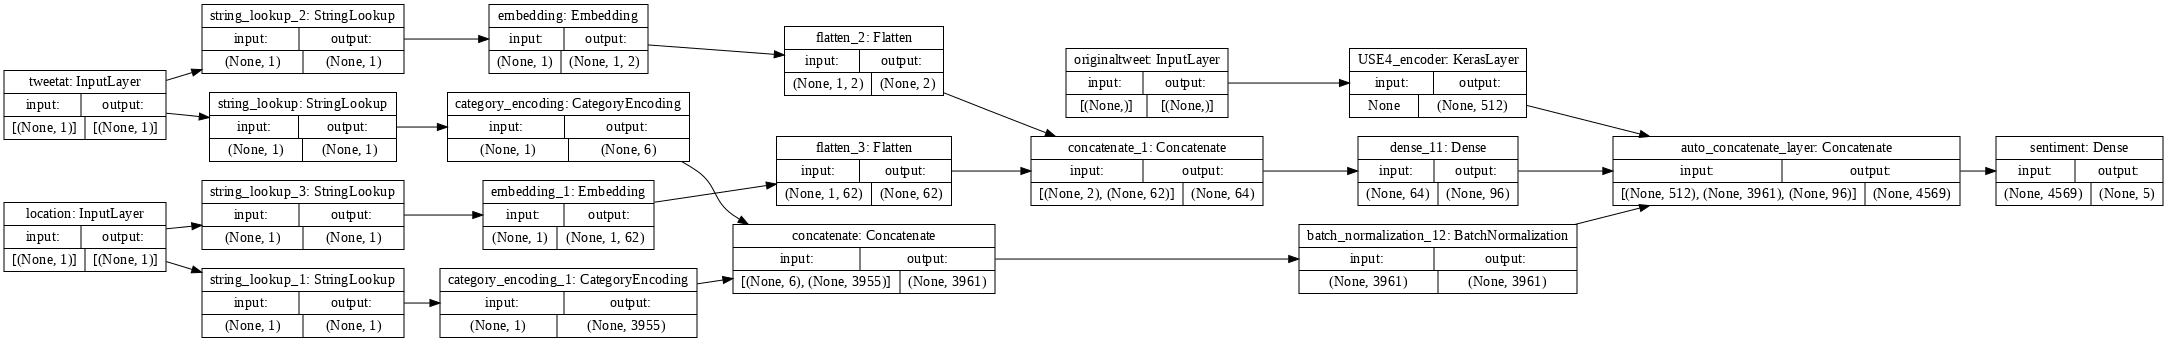

Model plot saved in file: deep_autoviml_churn_1_USE_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Training a USE model option...
    class_weights: {0: 1.273074474856779, 1: 1.3679890560875514, 2: 1.0, 3: 1.1305822498586773, 4: 1.0}
    original datasize = 10000, initial batchsize = 32
    recommended steps per epoch = 156
    recommended OneCycle steps = 109550
    default initializer = lecun_normal, default activation = selu
    Recommended: Increase patience for "onecycle" scheduler
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10.0
    number of epochs = 350, steps per epoch = 15

Splitting train into 80+20 percent: trai

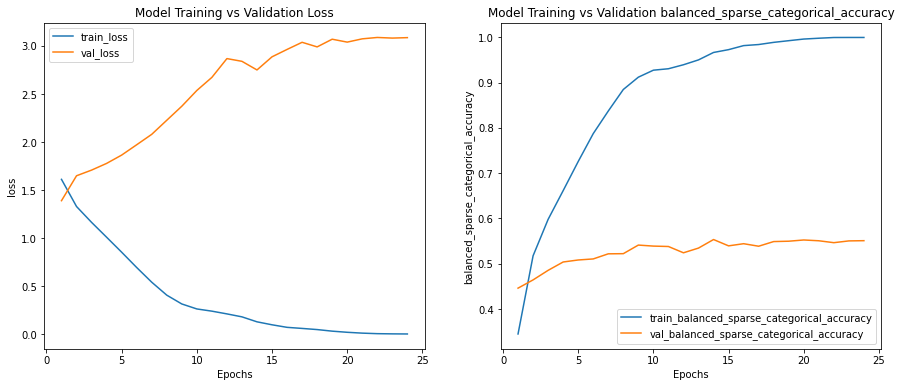


###########################################################
         Held-out test data set Results:
Single Label (single-output), Multi-Class Report: Sentiment
#################################################################


    Accuracy          = 54.9%
    Balanced Accuracy (average recall) = 55.3%
    Average Precision (macro) = 56.8%
    Precisions by class:
    54.6%      53.7%      57.5%      47.5%      70.7%  
    Recall Scores by class:
    63.6%      55.9%      59.0%      47.4%      50.7%  
    F1 Scores by class:
    58.8%      54.8%      58.2%      47.4%      59.0%  
#####################################################

Training on full train dataset for 14 epochs. This will take time...
    completed. Time taken (in mins) = 5


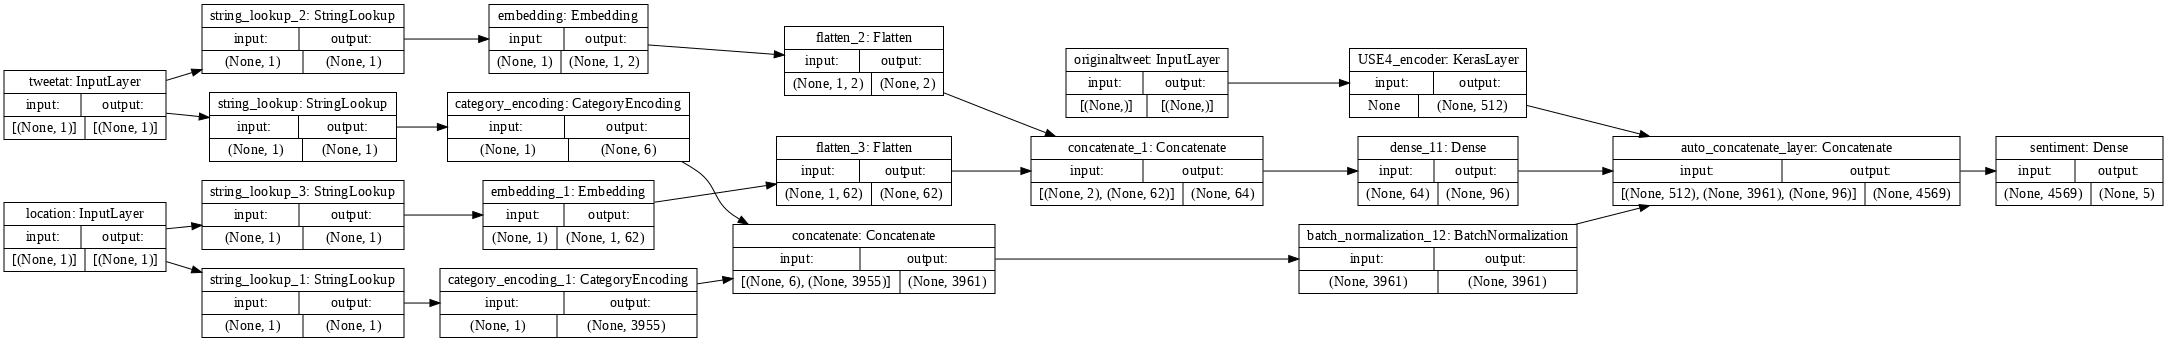

Model plot saved in file: deep_autoviml_churn_1_USE_model_after.png


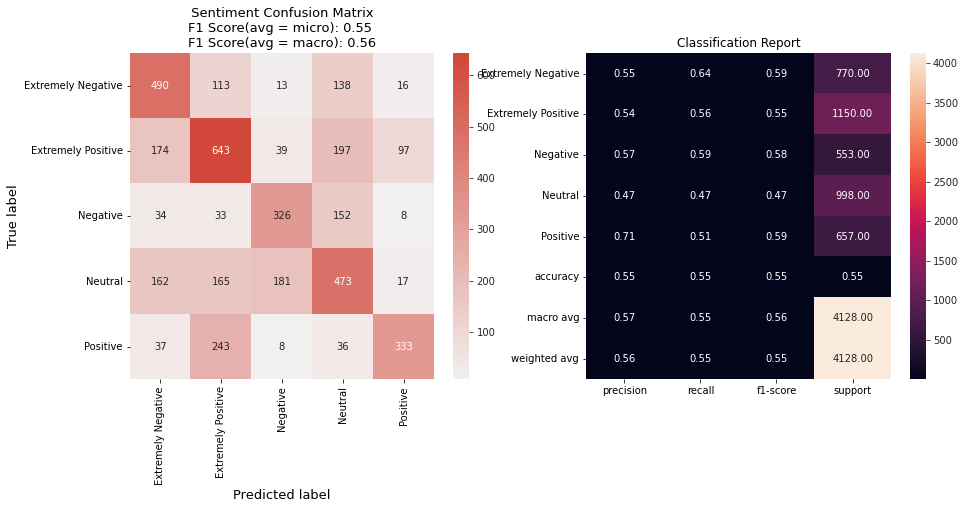

In [ ]:
model, dicti = deepauto.fit(trainfile, target, keras_model_type=keras_model_type, 
                            project_name='churn_1',
                 save_model_flag=False, model_options=model_options,
                            keras_options=keras_options, use_my_model='', verbose=2)

## **Model Evaluation**

In [ ]:
testfile = "/content/covid_data/Corona_NLP_test.csv"

In [ ]:
predictions = deepauto.predict(model, project_name='churn_1', test_dataset=testfile,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=dicti)


Loading deep_autoviml model from <keras.engine.functional.Functional object at 0x7ff770a80bd0> folder. This will take time...

Using <keras.engine.functional.Functional object at 0x7ff770a80bd0> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 3798
Alert! Modified column names to satisfy rules for column names in Tensorflow...
Alert! location has 2 mixed data types: Index([<class 'str'>, <class 'float'>], dtype='object') 
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    6 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        2 variable(s) to be removed since they were ID or low-information variables
Distribution of string columns in datatset:
    number of binary = 0, cats = 2, high cats =

In [ ]:
test = pd.read_csv(testfile)
predictions[0][:5]

array([[0.052, 0.   , 0.   , 0.927, 0.02 ],
       [0.   , 0.035, 0.   , 0.   , 0.964],
       [0.   , 0.   , 0.   , 0.   , 1.   ],
       [0.002, 0.   , 0.   , 0.997, 0.001],
       [0.972, 0.   , 0.   , 0.001, 0.027]], dtype=float32)

In [ ]:
predictions[1][:5]

array(['Neutral', 'Positive', 'Positive', 'Neutral', 'Extremely Negative'],
      dtype=object)

In [ ]:
test[target].values[:5]

array(['Extremely Negative', 'Positive', 'Extremely Positive', 'Negative',
       'Neutral'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
print(classification_report(test[target].values,predictions[1]))

                    precision    recall  f1-score   support

Extremely Negative       0.02      0.03      0.03       592
Extremely Positive       0.16      0.17      0.17       599
          Negative       0.21      0.09      0.12      1041
           Neutral       0.09      0.16      0.11       619
          Positive       0.26      0.23      0.25       947

          accuracy                           0.14      3798
         macro avg       0.15      0.14      0.13      3798
      weighted avg       0.17      0.14      0.14      3798



In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test[target].values, predictions[1]))

0.1395471300684571
